# Gravitationally bound objects in vacuum

## Goals

This project explores how objects with a mass and gravitational bounding behave for different accuracies of time steps and how this influences overall behavior in three-dimensional space. While two object problems can be calculated symbolicaly this remains a gap for 3 or more objects.

Hence, simulation is a major way of exploring these types of problems by approaching possible outcomes, may they be convergent or divergent, through experimenting with modelling parameters. Additionally, it provides a path to visually representing the model, and, thus, helping our intuition to become familiar with these problem types.


### First part
As a starting point two objects with a defined mass shall be simulated, each with a start velocity.
1. No visual output necessary. Command line output with position and velocity at the given time shall be sufficient. One cycle is ok for this part.  
2. Implement a recurring cycle for an undefined number of timesteps that can run automatically.  

### Second part
In the second part the simulation shall be extended:
1. Implement mechanism to run simulation for an arbitrary number of objects
2. Visual representation at runtime shall be implemented. Python libs for efficient representation shall be explored and used.

## Theory

Gravitational force is calculated using the formula:
$$ F = {{G m_1 m_2} \over {r^2}} $$

It calculates the force between two objects that have a mass and are gravitationally bound. The force vector directs toward the other object. This is true for two object problems.

With three or more objects it is necessary to calculate the resulting force vector of the gravitational force that each object is putting on the object in discussion.

This formula however, does not incorporate space dimensions and calculates a scalar value of the unit newtown.
To extend its meaning in the realm of space dimensions we introduce the following vectorized form:

$$ \vec{F_{21}} = -{{{G m_1 m_2} \over {\lvert{\vec{r_{21}^2}}\rvert}} \vec{r_{e21}}} $$

$ {\lvert{\vec{r_{21}}}\rvert} = \lvert r_2 - r_1 \rvert $ is the distance between the two objects.

$ \vec{r_{e21}} = {{r_2 - r_1} \over {\lvert r_2 - r_1 \rvert}} $ is the unit vector from object 1 to object 2; scaled to length 1; is scalar



Source: https://en.wikipedia.org/wiki/Newton%27s_law_of_universal_gravitation


## Implementation

## First part

### Defining the class and update schema
To account for the recurrence and comaprability of each object - that obviously share common properties - I've introduced the class _gravitationalObject_. It defines an object that has a mass, a position vector in 3D, a force vector in 3D that it experiences and a velocity vector in 3D.

Initially, I thought it would make sense to have dedicated properties for position and velocity that account for the step wise calculation of new position and velocity. However, it turned out, that this is not necessary, because every object only needs to know the force it currently experiences due to its gravitational effect with other objects and upon the update trigger can directly update the current values for velocity and position for the next step.

Update cycle for objects:
1. Calculate experienced force for each object and write to property (T = 0)
2. Calculate velocity and position for each object and write to property (T = 1)
3. Calculate experienced force ... (T = 1)
4. Calculate velocity and position ... (T = 2)  
(repeat)

### The math and physics behind
The above sequence already incorporates some key ideas of the math and physics that is involved (see __Theory__). Two masses that are in a vacuum, thus, do not experience friction or any other kind of force are governed only by the interaction between the objects. As these objects do not have an electric or magnetic property, gravitation remains as the only effect that needs consideration.

Hence, it is sufficient to know the force of attraction due to gravitation to calculate the next position and velocity of each object for an indefinitely small step size.

This is where the major constraint of this discrete approach comes from. We must assume that the calculated force remains static between simulation steps as we are obviously not able to calculate indefinitely small slices of time.

To account for this limitation the step size is a parameter of this model to be fine tuned. It should be as small as possible while keeping computational costs affordable.

Here is a thought experiment to demonstrate the limitation of this approach vs. actual physics:
1. A small mass object is standing still in space and there is another significantly larger mass object that is also present. We assume the large mass is fixed and does not move.

2. We first calculate the force that the large mass object excerts on the small mass object. We know that the force is pulling the small mass and would accelerate it, but at T=0 the object is not moving.

3. At T=1 we expect that the small mass object should have moved. To calculate a new position we must know the speed at any given time between T=0 and T=1 and must calculate its integral to derive its new position.

4. In this approach however we assume that the calculated speed at T=1 based on the force from T=0 is static.

5. With this the position at T=1 is calculated using a constant speed between T=0 and T=1, which results in a longer distance traveled than it would in real world.

6. Acceleration is also assumed to be constant, which is not true as shorter distances between the objects results in higher force, and, thus, in higher acceleration.

These shortcomings ideally require a form of compensation, that involves computational cost somewhere between shortening the simulation step size significantly and simple linear correction functions. Hence, it would yield an efficient, yet good enough estimation of what happens between the steps.

In this simulation we just assume that small enough step sizes yield convergent and somewhat realistic results.

### Defining the program structure
For the start, I only focus on two objects. To account for more objects that will be introduced in a later step I register every newly instantiated object of the class _gravitationalObject_ with _objectsList_ that holds all objects under consideration.

The user is prompted in the console to provide the number of simulation steps to be performed as well as the step size in seconds.

The simulation steps define the number of iterations for the loop and the step size is used in calculating the position and velocity at the next step.

### Visualizing the result
To visualize and verify the correctness of the approach _matplotlib_ is used. In this step I employ a 3-dimensional plot that draws calculated positions. Results can be verified by adding annotations based on the respective step that was calculated. This helps to identify into which direction the movement of the objects is taking place.

Provide number of simulation steps:1000000
Provide stepsize for one step in seconds (standard is 1 sec):0.1


<IPython.core.display.Javascript object>


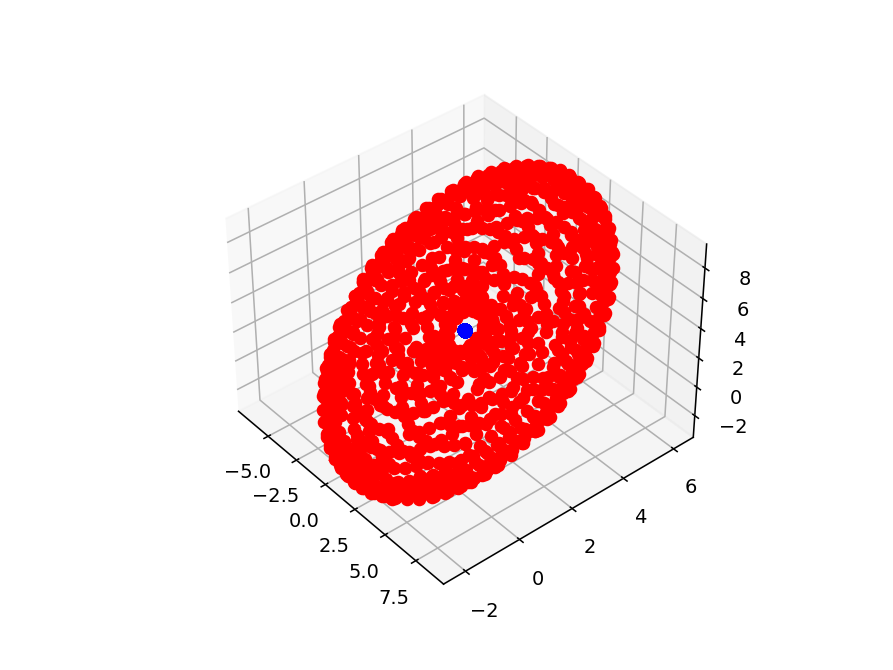

In [36]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

# Global variables
G = 6.6743*10**(-11) # gravitational constant G
timestep = 1.0 # initialize timestep of 1 second

# Create infractructure to track objects
objectsList = []

# Define objects under discussion
class gravitationalObject:
    
    def printer(self):
        print("\n")
        print("name: " + self.name)
        print("mass: " + str(self.mass) + "kg")
        print("position x: " + str(self.position[0]))
        print("position y: " + str(self.position[1]))
        print("position z: " + str(self.position[2]))
        print("force x   : " + str(self.force[0]))
        print("force y   : " + str(self.force[1]))
        print("force z   : " + str(self.force[2]))
        print("velocity x: " + str(self.velocity[0]))
        print("velocity y: " + str(self.velocity[1]))
        print("velocity z: " + str(self.velocity[2]))
        
    # Defining internal variables & constructor
    force = np.array([0.0, 0.0, 0.0])
    
    
    def __init__(self, name, mass, position, velocity):
        self.name = name # any name that is distinguishable
        self.mass = mass # mass in kg
        self.position = position # position in kilometers as numpy vector
        self.velocity = velocity # velocity in m/s as numpy vector
        # self.new_position = position  # not required if force is always calculated first
        # self.new_velocity = velocity  # not required if force is always calculated first
        # self.printer()                # print object init to console
    
    
# Create objects
objectsList.append(gravitationalObject("Ball 1", 123456789000, np.array([1.0,2.0,3.0]), np.array([0.0, 0.0, 0.0])))
objectsList.append(gravitationalObject("Ball 2", 123456.789, np.array([-1.0,-2.0,-3.0]), np.array([0.5, 0.0, 0.0])))
    

# Physical interaction between objects (can I call this 'engine' ?)

## Ask user about number of simulation steps the program should run
iterations = int(input("Provide number of simulation steps:"))
timestep = float(input("Provide stepsize for one step in seconds (standard is 1 sec):"))

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(objectsList[0].position[0], objectsList[0].position[1], objectsList[0].position[2], 'o', color='blue')
ax.plot3D(objectsList[1].position[0], objectsList[1].position[1], objectsList[1].position[2], 'x', color='red')


i = 0
while i < iterations:
    
    i+=1
    
    ## calculate gravitational force on each object

    objectsList[0].force = (
                             G * objectsList[0].mass * objectsList[1].mass
                            / np.linalg.norm(objectsList[1].position - objectsList[0].position)**2
                            * ((objectsList[1].position - objectsList[0].position)
                               /(np.linalg.norm(objectsList[1].position - objectsList[0].position)))
                            )

    objectsList[1].force = (-1) * objectsList[0].force


    ## calculate velocity of each object ** after update **

    #### F = m * a -> a = F / m; v/t = F/m -> v = F/m * t
    #### Holds a strong assumption, that acceleration (= force...) is constant for path between steps;
    #### Should (!!) consider integral of acceleration for large enough step sizes; but other objects are also moving... damn

    objectsList[0].velocity += objectsList[0].force / objectsList[0].mass * timestep
    objectsList[1].velocity += objectsList[1].force / objectsList[1].mass * timestep



    ## calculate position of each object ** after update **

    #### dx = v * dt

    objectsList[0].position += objectsList[0].velocity * timestep
    objectsList[1].position += objectsList[1].velocity * timestep


    ## print objects after update
    
    #objectsList[0].printer()
    #objectsList[1].printer()

    # reduce crowding of plot for large number of iterations
    
    if (iterations > 1000):
        if (i%(iterations/1000)==0):
            ax.plot3D(objectsList[0].position[0], objectsList[0].position[1], objectsList[0].position[2], 'o', color='blue')
            ax.plot3D(objectsList[1].position[0], objectsList[1].position[1], objectsList[1].position[2], 'o', color='red')
        
    else:
        ax.plot3D(objectsList[0].position[0], objectsList[0].position[1], objectsList[0].position[2], 'o', color='blue')
        ax.plot3D(objectsList[1].position[0], objectsList[1].position[1], objectsList[1].position[2], 'o', color='red')
        # ax.text(objectsList[1].position[0], objectsList[1].position[1], objectsList[1].position[2], str(i), color='red')



## Second part



Provide number of simulation steps:10
Provide stepsize for one step in seconds (standard is 1 sec):0.1


<IPython.core.display.Javascript object>


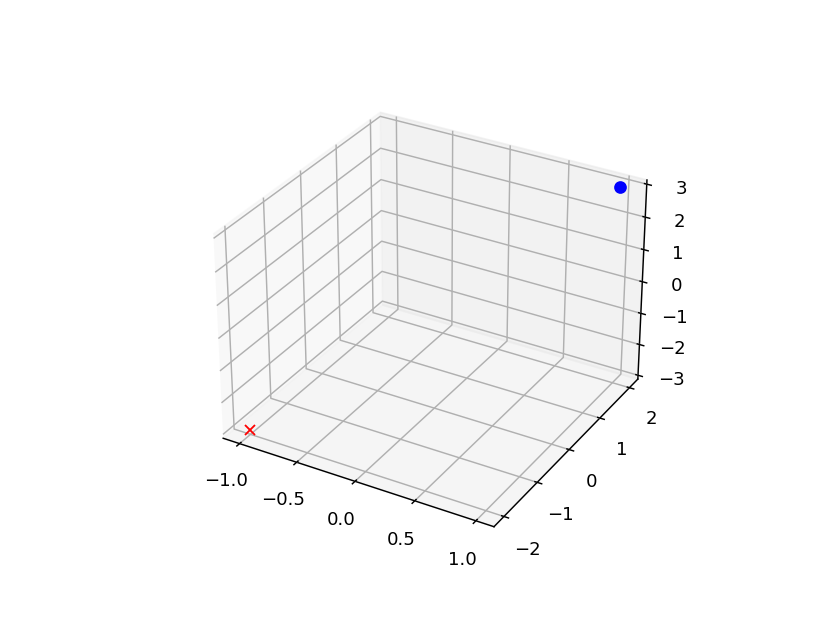

/tmp/ipykernel_61165/4017250518.py:83: RuntimeWarning: divide by zero encountered in double_scalars
  G * objectsList[j].mass * objectsList[k].mass
/tmp/ipykernel_61165/4017250518.py:85: RuntimeWarning: invalid value encountered in true_divide
  * ((objectsList[k].position - objectsList[j].position)


ValueError: setting an array element with a sequence.

In [95]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

# Global variables
G = 6.6743*10**(-11) # gravitational constant G
timestep = 1.0 # initialize timestep of 1 second

# Create infractructure to track objects
objectsList = []

# Define objects under discussion
class gravitationalObject:
    
    def printer(self):
        print("\n")
        print("name: " + self.name)
        print("mass: " + str(self.mass) + "kg")
        print("position x: " + str(self.position[0]))
        print("position y: " + str(self.position[1]))
        print("position z: " + str(self.position[2]))
        print("force x   : " + str(self.force[0]))
        print("force y   : " + str(self.force[1]))
        print("force z   : " + str(self.force[2]))
        print("velocity x: " + str(self.velocity[0]))
        print("velocity y: " + str(self.velocity[1]))
        print("velocity z: " + str(self.velocity[2]))
        
    # Defining internal variables & constructor
    force = np.array([0.0, 0.0, 0.0])
    
    
    def __init__(self, name, mass, position, velocity):
        self.name = name # any name that is distinguishable
        self.mass = mass # mass in kg
        self.position = position # position in kilometers as numpy vector
        self.velocity = velocity # velocity in m/s as numpy vector
        # self.new_position = position  # not required if force is always calculated first
        # self.new_velocity = velocity  # not required if force is always calculated first
        # self.printer()                # print object init to console
    
    
# Create objects
objectsList.append(gravitationalObject("Ball 1", 123456789000, np.array([1.0,2.0,3.0]), np.array([0.0, 0.0, 0.0])))
objectsList.append(gravitationalObject("Ball 2", 123456.789, np.array([-1.0,-2.0,-3.0]), np.array([0.5, 0.0, 0.0])))
    

# Physical interaction between objects (can I call this 'engine' ?)

## Ask user about number of simulation steps the program should run
iterations = int(input("Provide number of simulation steps:"))
timestep = float(input("Provide stepsize for one step in seconds (standard is 1 sec):"))

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(objectsList[0].position[0], objectsList[0].position[1], objectsList[0].position[2], 'o', color='blue')
ax.plot3D(objectsList[1].position[0], objectsList[1].position[1], objectsList[1].position[2], 'x', color='red')


i = 0
while i < iterations:
    
    i+=1
    
    ## calculate gravitational force on each object
    
    ### initialize parameters for calculation
    n = len(objectsList)                        # number of objects
    forceMatrix = np.empty([n, n], dtype=float) # empty matrix of floats to store force components
    
    
    ### Calculate force components in a matrix
    ### open: reduce computational cost by calculating M_new =  M_old + M_old_transposed for diagnonal values
    j = 0
    while j < n:
        
        k = 0
        while k < n:
            
            if (k!=n):
                forceMatrix[j, k] = (
                                 G * objectsList[j].mass * objectsList[k].mass
                                / np.linalg.norm(objectsList[k].position - objectsList[j].position)**2
                                * ((objectsList[k].position - objectsList[j].position)
                                /(np.linalg.norm(objectsList[k].position - objectsList[j].position)))
                            )
        
    ### update each object with force first, then velocity and position
    l = 0
    while l < n:
        ### write sum of force components into object's force property
        objectsList[l].force = sum(forceMatrix)[l]
        
        ### update velocity
        objectsList[l].velocity += objectsList[l].force / objectsList[l].mass * timestep
        
        ### update position
        objectsList[0].position += objectsList[0].velocity * timestep
    


    ## print objects after update
    
    #objectsList[0].printer()
    #objectsList[1].printer()

    # reduce crowding of plot for large number of iterations
    
    if (iterations > 1000):
        if (i%(iterations/1000)==0):
            ax.plot3D(objectsList[0].position[0], objectsList[0].position[1], objectsList[0].position[2], 'o', color='blue')
            ax.plot3D(objectsList[1].position[0], objectsList[1].position[1], objectsList[1].position[2], 'o', color='red')
        
    else:
        ax.plot3D(objectsList[0].position[0], objectsList[0].position[1], objectsList[0].position[2], 'o', color='blue')
        ax.plot3D(objectsList[1].position[0], objectsList[1].position[1], objectsList[1].position[2], 'o', color='red')
        # ax.text(objectsList[1].position[0], objectsList[1].position[1], objectsList[1].position[2], str(i), color='red')



In [50]:
z = 5
a = np.empty([z, z], dtype=float)
print(a)

[[ 4.65691872e-310  0.00000000e+000  6.84015879e-183  8.82058354e-299
   4.45207037e-161]
 [ 1.63709432e-260 -4.66487004e-076  4.30718156e+117  9.66303374e+054
   2.22546716e-308]
 [-7.80533465e+019 -7.20278858e+216 -1.51543382e+222  2.58193434e-149
   6.23818423e-212]
 [ 2.75309383e-303  3.06706863e-144  1.01805340e-093 -8.99755933e+302
  -6.81170580e-090]
 [-3.73242727e+101 -1.24377691e+207  1.53667311e-076  2.07206806e-310
   2.76676762e-321]]


In [94]:
a = np.ones([1,3])
b = np.zeros([1,3,2])
print(sum(a)[2])

IndexError: index 3 is out of bounds for axis 0 with size 3